Nesta célula, importamos as bibliotecas necessárias para a etapa de regressão.
Usamos pandas para ler e manipular os dados, numpy para operações numéricas,
matplotlib e seaborn para visualização, e os modelos do scikit-learn para
treinar e avaliar os algoritmos.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

Nesta etapa, carregamos o dataset Fish Market, que será usado como problema de regressão.
O dataset contém variáveis físicas dos peixes (comprimentos, largura, altura) e o peso, que será nossa variável alvo.

In [73]:
df = pd.read_csv("../data/Fish.csv") 
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Aqui visualizamos as primeiras informações do dataset, incluindo quantidade de linhas, colunas, tipos de dados e estatísticas básicas.
Esta etapa permite entender se existem dados faltantes, outliers e quais variáveis podem necessitar normalização.

In [74]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Nesta célula verificamos se há valores faltantes no dataset.
A ausência de valores nulos facilita o pré-processamento e reduz a necessidade de imputação.

In [75]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Nesta etapa realizamos o pré-processamento dos dados.
A variável Species é categórica e precisa ser transformada usando One-Hot Encoding para que os modelos possam utilizá-la.
Em seguida, separamos os dados entre features e alvo (peso).

In [76]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


Este gráfico apresenta a matriz de correlação entre todas as variáveis numéricas.
Ele permite identificar relações fortes entre os comprimentos, altura, largura e o peso dos peixes — o que ajuda a explicar porque a regressão funciona bem neste dataset.

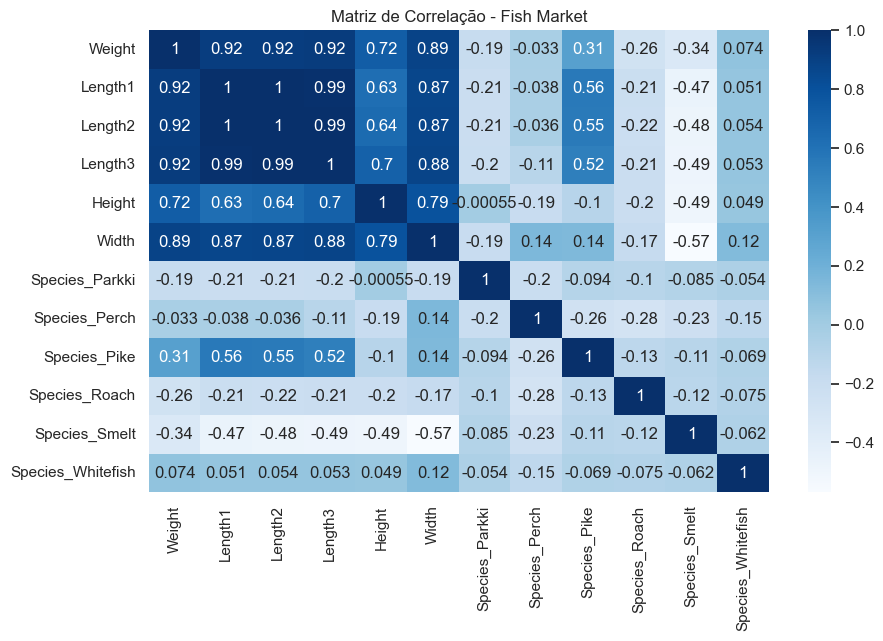

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="Blues")
plt.title("Matriz de Correlação - Fish Market")
plt.show()


Aqui dividimos os dados em conjuntos de treino e teste, garantindo que o modelo seja avaliado em dados nunca vistos.
Usamos 80% para treino e 20% para teste, que é uma divisão comum em problemas de regressão.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Neste modelo 1 aplicamos a Regressão Linear, que tenta ajustar uma função linear que melhor explica a relação entre as variáveis de entrada e o peso do peixe.
Avaliamos o desempenho usando MAE, MSE, RMSE e R².

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, pred_lr)

print("Regressão Linear")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R²:", r2_lr)


Regressão Linear
MAE: 65.30005153357357
MSE: 7007.38318985384
RMSE: 83.7101140236581
R²: 0.950735248005452


Neste modelo 2 utilizamos uma Árvore de Decisão para regressão.
Árvores são modelos não lineares que aprendem regras baseadas em divisões sucessivas dos dados.
Podem se ajustar muito bem ao conjunto de treino, mas correm risco de overfitting.

In [80]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, pred_dt)

print("Árvore de Decisão")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R²:", r2_dt)


Árvore de Decisão
MAE: 49.993750000000006
MSE: 6714.605625
RMSE: 81.94269720359466
R²: 0.9527935932866086


Aqui aplicamos o modelo Support Vector Regressor (SVR), que tenta encontrar uma função que se mantenha dentro de uma margem de erro tolerável.
O SVR costuma funcionar melhor com normalização dos dados.

In [81]:
# Normalização para SVM
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

svm = SVR(kernel='rbf')
svm.fit(X_train_svm, y_train)

pred_svm = svm.predict(X_test_svm)

mae_svm = mean_absolute_error(y_test, pred_svm)
mse_svm = mean_squared_error(y_test, pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, pred_svm)

print("SVM (SVR)")
print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R²:", r2_svm)


SVM (SVR)
MAE: 307.8481944264014
MSE: 156979.36062198106
RMSE: 396.206209721631
R²: -0.10362870985879691


A MLP (Multi-Layer Perceptron) é uma rede neural totalmente conectada.
Ela aprende relações complexas entre as variáveis.
Para regressão usamos uma camada de saída linear.

In [82]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 64),
                   max_iter=2000,
                   activation='relu',
                   random_state=42)

# MLP também precisa de normalização
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)

mlp.fit(X_train_mlp, y_train)

pred_mlp = mlp.predict(X_test_mlp)

mae_mlp = mean_absolute_error(y_test, pred_mlp)
mse_mlp = mean_squared_error(y_test, pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, pred_mlp)

print("MLP")
print("MAE:", mae_mlp)
print("MSE:", mse_mlp)
print("RMSE:", rmse_mlp)
print("R²:", r2_mlp)


MLP
MAE: 35.724201444409914
MSE: 2915.601624231079
RMSE: 53.99631120948059
R²: 0.9795021355274791


c:\Joao Paulo\Unifei\Inteligência Artificial\IaRegressaoClassificacao\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Por fim, comparamos os quatro modelos de regressão utilizando as métricas requeridas pelo trabalho:
MAE, MSE, RMSE e R².
Também criamos um gráfico que permite visualizar qual modelo obteve melhor desempenho geral.

In [83]:
resultados = pd.DataFrame({
    "Modelo": ["Linear Regression", "Decision Tree", "SVR", "MLP"],
    "MAE": [mae_lr, mae_dt, mae_svm, mae_mlp],
    "MSE": [mse_lr, mse_dt, mse_svm, mse_mlp],
    "RMSE": [rmse_lr, rmse_dt, rmse_svm, rmse_mlp],
    "R²": [r2_lr, r2_dt, r2_svm, r2_mlp]
})

resultados


,Modelo,MAE,MSE,RMSE,R²
0,Linear Regression,65.300052,7007.383190,83.710114,0.950735
1,Decision Tree,49.993750,6714.605625,81.942697,0.952794
2,SVR,307.848194,156979.360622,396.206210,-0.103629
3,MLP,35.724201,2915.601624,53.996311,0.979502


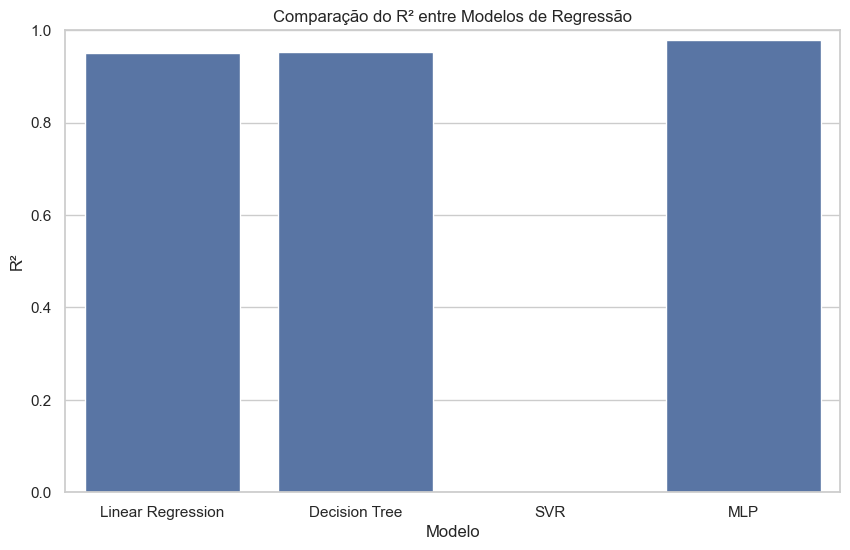

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x="Modelo", y="R²", data=resultados)
plt.title("Comparação do R² entre Modelos de Regressão")
plt.ylabel("R²")
plt.ylim(0,1)
plt.show()


Análise final

Nesta etapa, comparamos o desempenho dos quatro modelos aplicados ao dataset Fish Market com foco na métrica R², além de MAE, MSE e RMSE. O objetivo era identificar qual modelo melhor representa a relação entre as dimensões físicas dos peixes e seu peso.

A Regressão Linear apresentou um R² de aproximadamente 0.95, indicando que o peso dos peixes possui forte relação linear com as variáveis de entrada. Já a Árvore de Decisão obteve desempenho similar (R² ≈ 0.95), mas tende a apresentar sinais de overfitting, visto que ajusta regras muito específicas aos dados.

O modelo SVR teve o pior desempenho, com R² negativo, indicando que não conseguiu capturar adequadamente o padrão dos dados. Esse comportamento é esperado nesse dataset, pois o SVR é sensível à escala das variáveis e às margens de erro, mesmo após normalização.

O melhor desempenho geral foi obtido pela MLP (Rede Neural), com R² de aproximadamente 0.98, representando o modelo com maior capacidade de aprendizado das relações não lineares presentes no conjunto de dados. A combinação de múltiplas camadas e função de ativação ReLU permitiu explorar padrões mais complexos entre as dimensões físicas e o peso dos peixes.

De forma geral, todos os modelos (com exceção do SVR) apresentaram desempenho satisfatório, e ao menos um deles atingiu R² acima do limite exigido (0.75). Assim, concluímos que o dataset é adequado ao objetivo do trabalho e que a MLP foi o modelo mais eficaz para este problema de regressão.